In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

##Lectura de Datos

In [2]:
df = pd.read_csv('/content/sample_data/shoes_dataset.csv')
df

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,12/31/2016,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,$139.00,0%,$139.00
14963,65774,12/31/2016,United States,2181,US12,Female,12.0,42-43,10.0,$149.00,0%,$149.00
14964,65775,12/31/2016,Canada,2203,CAN6,Male,10.5,43-44,10.0,$179.00,30%,$125.30
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,$199.00,0%,$199.00


##Data Cleaning (Limpieza de Datos)

Primero, revisamos los tipos de datos para nuestro análisis

In [3]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  object 
 10  Discount       14967 non-null  object 
 11  SalePrice      14967 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


Luego, cambiamos la columna Date para separarla por día, mes y año para una mejor lectura.

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  object        
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  object        
 12  Year           14967 non-null  int64         
 13  Day            14967 non-null  int64         
 14  Month          14967 non-null  int64         
dtypes: datetime64[ns](1

Asimismo, separamos las fechas por columnas por dia, mes y año para realizar un mejor análisis de datos.

In [6]:
df

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Year,Day,Month
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00,2014,1,1
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20,2014,1,1
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20,2014,1,1
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00,2014,1,1
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,$139.00,0%,$139.00,2016,31,12
14963,65774,2016-12-31,United States,2181,US12,Female,12.0,42-43,10.0,$149.00,0%,$149.00,2016,31,12
14964,65775,2016-12-31,Canada,2203,CAN6,Male,10.5,43-44,10.0,$179.00,30%,$125.30,2016,31,12
14965,65776,2016-12-31,Germany,2231,GER1,Female,9.5,40,7.5,$199.00,0%,$199.00,2016,31,12


Las columnas de precio unitario y de venta contienen el signo de dólar. Esto puede afectar al análisis, por lo que la mejor opción es cambiar el formato a float.

In [7]:
df['SalePrice'] = df['SalePrice'].apply(lambda x: float(x[2:]))
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x[2:]))

In [8]:
df

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Year,Day,Month
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0%,159.0,2014,1,1
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199.0,20%,159.2,2014,1,1
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,20%,119.2,2014,1,1
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159.0,0%,159.0,2014,1,1
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0%,159.0,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139.0,0%,139.0,2016,31,12
14963,65774,2016-12-31,United States,2181,US12,Female,12.0,42-43,10.0,149.0,0%,149.0,2016,31,12
14964,65775,2016-12-31,Canada,2203,CAN6,Male,10.5,43-44,10.0,179.0,30%,125.3,2016,31,12
14965,65776,2016-12-31,Germany,2231,GER1,Female,9.5,40,7.5,199.0,0%,199.0,2016,31,12


###Gráficos de tiendas

Definimos los 2 tipos de variable, que son las categóricas y las numéricas.

In [14]:
categorical_variables = ['Country', 'ProductID', 'Shop', 'Gender', 'Size (US)', 'Discount', 'Year', 'Month']
numerical_variables = ['UnitPrice', 'SalePrice']

Se grafican las tiendas que tienen más cantidad de tiendas

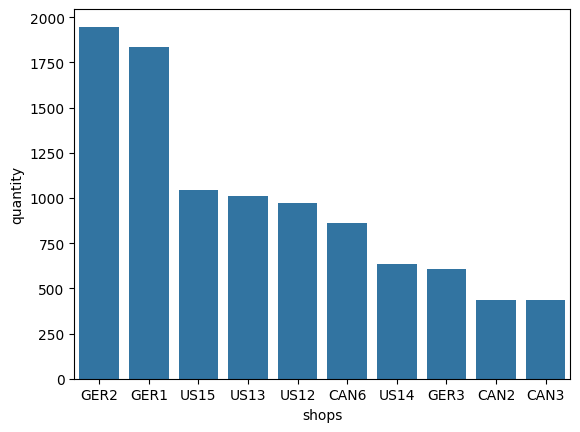

In [17]:
frequency_shops = df['Shop'].value_counts().head(10)
df_frequency_shops = pd.DataFrame({'shops' : frequency_shops.index.tolist(), 'quantity' : frequency_shops.tolist()})
sns.barplot(x='shops', y='quantity', data=df_frequency_shops)
plt.show()

Se observa que Germany es quien posee más tiendas en general, puesto que el y 1 y 2 del mismo país es quien tiene más cantidad.

###Gráficos de comparación

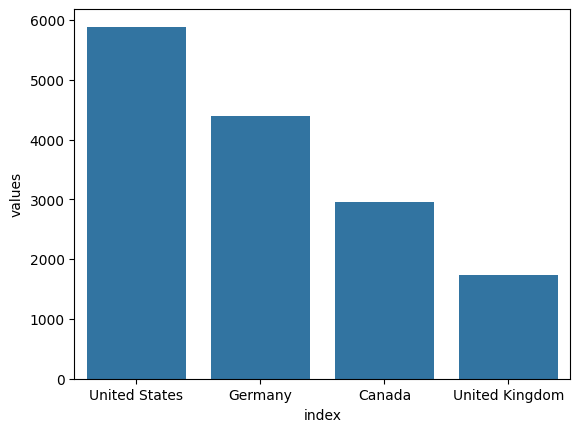

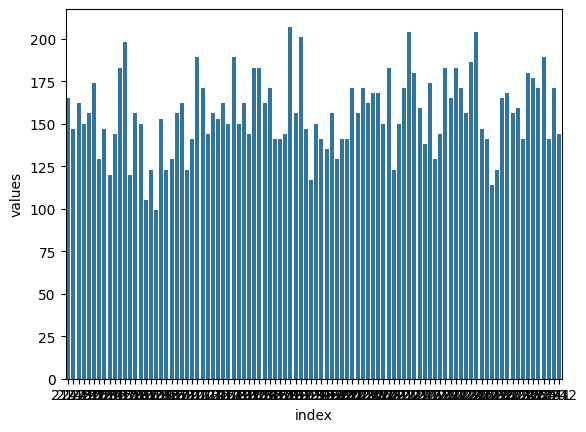

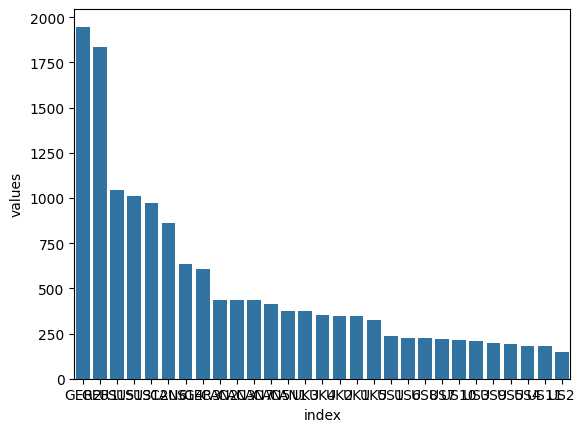

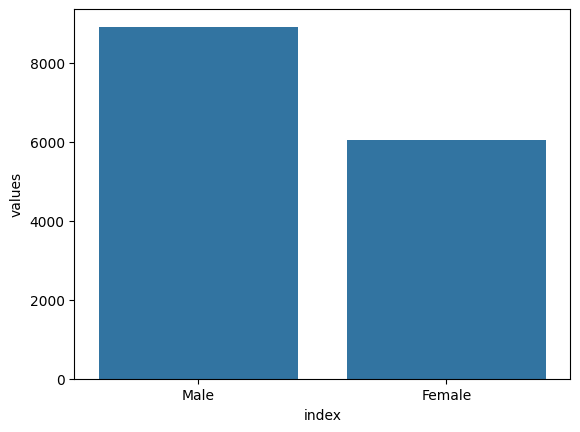

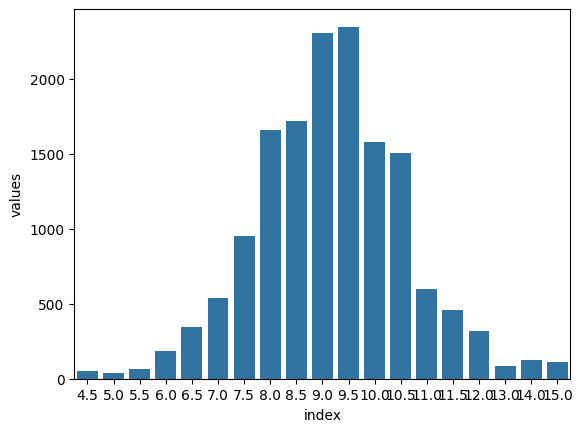

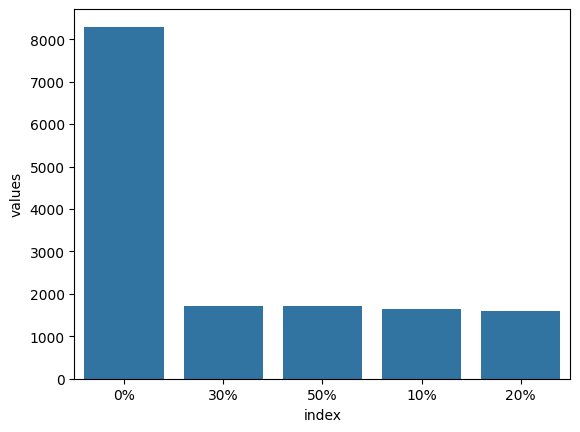

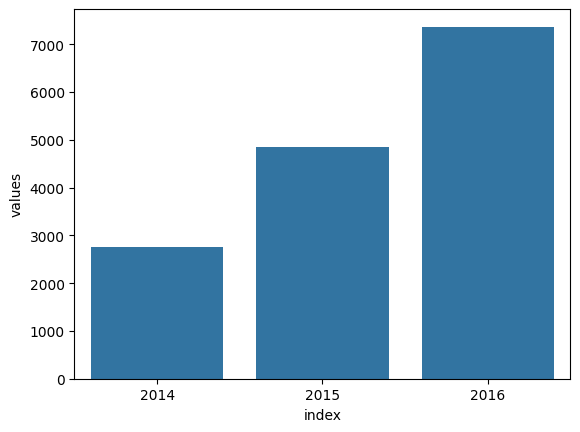

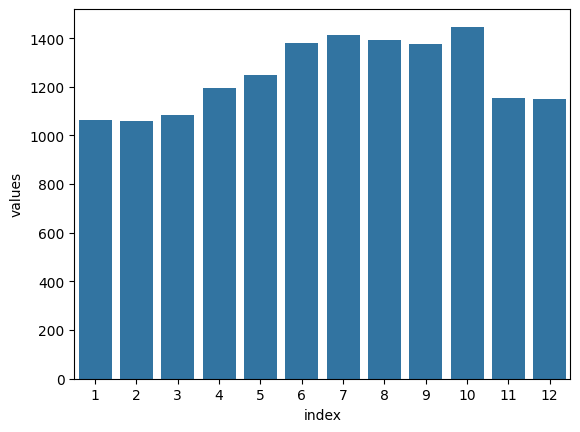

In [20]:
for cat_variable in categorical_variables:
    frequency = df[cat_variable].value_counts()
    df_frequency = pd.DataFrame({'index': frequency.index.tolist(), 'values': frequency.tolist()})
    sns.barplot(x='index', y='values', data=df_frequency)
    plt.show()

###Comparación de las distribuciones de UnitPrice y SalePrice

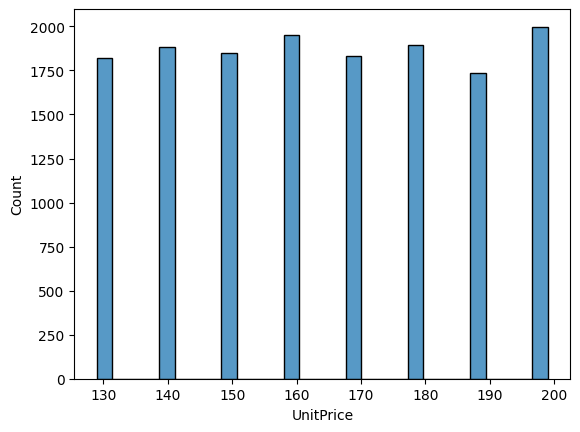

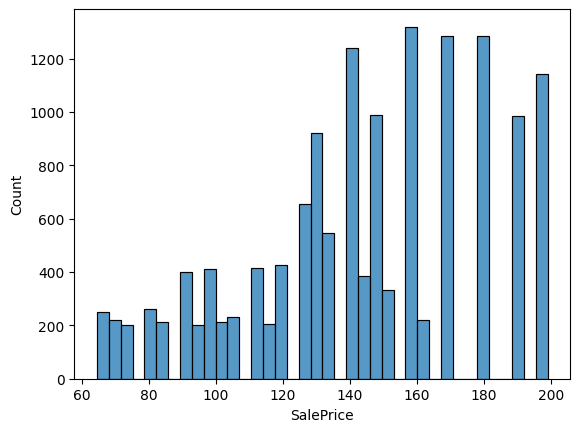

In [19]:
for num_variable in numerical_variables:
    sns.histplot(df[num_variable], bins='auto')
    plt.show()

El Precio Unitario se mantiene uniforme y existen tantas zapatillas cerca de un mismo precio. Mientras que, en SalePrice, hay descuentos aplicados.

###Mapa de calor

<ipython-input-21-3c85f8c7f638>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


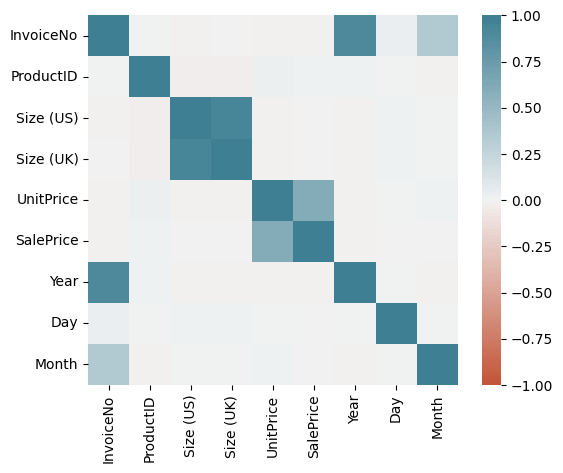

In [21]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
plt.show()

Con el mapa de calor, verificamos si existe una correlación importante, la cual existe en InvoiceNo y Year. Siendo que, a mayor cantidad de zapatillas, el InvoiceNo incrementa junto con él cada año.

##Solución Propuesta

Como conclusión, notamos que Estados Unidos es el principal mercado y que, en los dos últimos años, los hombres son un mercado mayor que el de las mujeres.

###Orden de los datos

Para resolver el problema, debemos calcular la cantidad máxima de zapatillas que se venderán en base a nuestras ventas.

In [23]:
grouped = df[(df['Year'] != 2014) & (df['Gender'] == 'Male')
             & (df['Country'] == 'United States')].groupby(
             ['Size (US)', 'Year', 'Month']).size()\
             .unstack(level=0).fillna(value=0)
grouped

Size (US)   6.0   6.5   7.0   7.5   8.0   8.5   9.0   9.5   10.0  10.5  11.0  \
Year Month                                                                     
2015 1       0.0   4.0   0.0   0.0   5.0   4.0  10.0  18.0   8.0   7.0   5.0   
     2       0.0   1.0   0.0   1.0   3.0   5.0  14.0  16.0  13.0  13.0   5.0   
     3       0.0   0.0   0.0   2.0   1.0   3.0   7.0  23.0  13.0   8.0   4.0   
     4       0.0   1.0   0.0   1.0   0.0   1.0   9.0  15.0  15.0   8.0   7.0   
     5       3.0   0.0   1.0   0.0   6.0   2.0  17.0  16.0   7.0  15.0   5.0   
     6       1.0   0.0   2.0   0.0   6.0  11.0  16.0  16.0  20.0  10.0   5.0   
     7       1.0   2.0   1.0   3.0   4.0   6.0  20.0  19.0  22.0  16.0   4.0   
     8       3.0   3.0   0.0   2.0   0.0   6.0  21.0  26.0  18.0   8.0   6.0   
     9       5.0   0.0   1.0   3.0   5.0   4.0  13.0  25.0  22.0  16.0   3.0   
     10      4.0   1.0   2.0   2.0   6.0  12.0  17.0  17.0  15.0  16.0   5.0   
     11      0.0   3.0   2.0   2.0   3.0   4.0  10.0  35.0  11.0  17.0   5.0   
     12      0.0   3.0   3.0   2.0   3.0   2.0  12.0  24.0  14.0  14.0  10.0   
2016 1       4.0   3.0   0.0   3.0   7.0  12.0  17.0  19.0  17.0  13.0   5.0   
     2       1.0   2.0   0.0   2.0   9.0  12.0  13.0  25.0  26.0  16.0  16.0   
     3       3.0   0.0   1.0   3.0   7.0   8.0  13.0  27.0  26.0  22.0  13.0   
     4       1.0   1.0   0.0   1.0   3.0   8.0  11.0  24.0  19.0  14.0  10.0   
     5       3.0   0.0   6.0   7.0  12.0  15.0  21.0  26.0  16.0  28.0  10.0   
     6       3.0   0.0   4.0   0.0   2.0   9.0  22.0  33.0  31.0  19.0  11.0   
     7       3.0   1.0   4.0   7.0   9.0  17.0  25.0  25.0  25.0  18.0  15.0   
     8       4.0   7.0   2.0   3.0   4.0  17.0  30.0  47.0  24.0  15.0   8.0   
     9       3.0   2.0   3.0   4.0   7.0   6.0  26.0  31.0  23.0  19.0   9.0   
     10      7.0   1.0   0.0   6.0   5.0   9.0  25.0  44.0  31.0  21.0   7.0   
     11      3.0   2.0   0.0   1.0   2.0  10.0  13.0  37.0  15.0  16.0   6.0   
     12      0.0   1.0   0.0   1.0   6.0   6.0  10.0  26.0  20.0  10.0   7.0   

Size (US)   11.5  12.0  13.0  14.0  15.0  
Year Month                                
2015 1       3.0   1.0   0.0   1.0   0.0  
     2       3.0   0.0   0.0   2.0   0.0  
     3       2.0   0.0   1.0   1.0   0.0  
     4       3.0   3.0   0.0   2.0   0.0  
     5       6.0   1.0   1.0   1.0   1.0  
     6       9.0   4.0   3.0   0.0   0.0  
     7       6.0   1.0   1.0   3.0   0.0  
     8       6.0   2.0   0.0   3.0   1.0  
     9       3.0   4.0   0.0   0.0   1.0  
     10      8.0   3.0   3.0   1.0   0.0  
     11      3.0   6.0   0.0   2.0   1.0  
     12      7.0   3.0   1.0   2.0   1.0  
2016 1       4.0   3.0   1.0   2.0   0.0  
     2       3.0   0.0   1.0   6.0   0.0  
     3       6.0   0.0   2.0   3.0   0.0  
     4       3.0   4.0   0.0   3.0   1.0  
     5       3.0   4.0   3.0   5.0   1.0  
     6       5.0   4.0   2.0   3.0   0.0  
     7       6.0   3.0   1.0   2.0   4.0  
     8       4.0  12.0   0.0   1.0   0.0  
     9       5.0   4.0   0.0   0.0   0.0  
     10     12.0   9.0   4.0   1.0   0.0  
     11     13.0   2.0   3.0   2.0   0.0  
     12      5.0   1.0   2.0   1.0   2.0

Acomodamos los datos de esta forma, siendo que en las columnas se encuentran las tallas de las zapatillas y en las filas, los años y meses

###Fórmula de Intervalo de confianza

Usamos la siguiente fórmula para calcular el intervalo de confianza

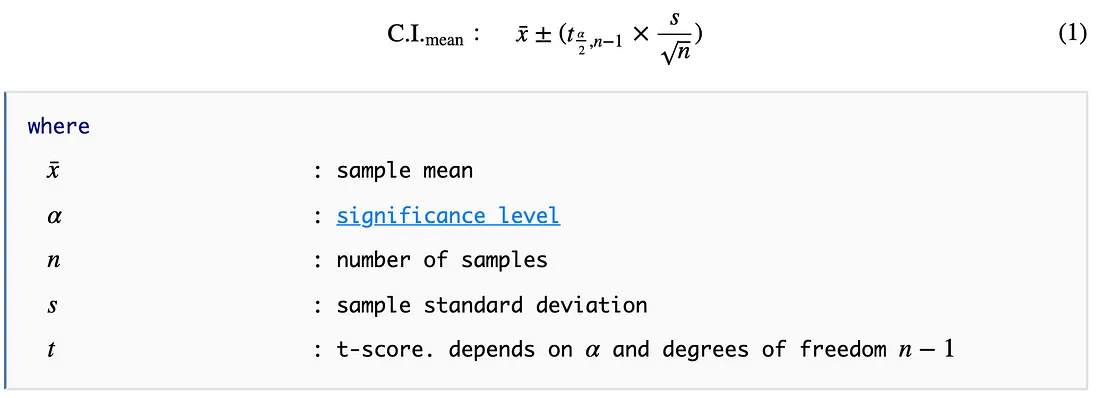

In [24]:
means = []
standard_errors = []
for column in grouped.columns:
    means.append(grouped[column].mean())
    standard_errors.append(grouped[column].sem())

d = {'means': means, 'std_error': standard_errors}
df_calculations = pd.DataFrame(data=d, index=grouped.columns)

In [26]:
df_calculations

,means,std_error,error_margin
Size (US),,,
6.0,2.166667,0.393179,0.813880
6.5,1.583333,0.340059,0.703922
7.0,1.333333,0.338725,0.701160
7.5,2.333333,0.411196,0.851176
8.0,4.791667,0.598849,1.239618
8.5,7.875000,0.944689,1.955505
9.0,16.333333,1.262139,2.612628
9.5,25.583333,1.766144,3.655917
10.0,18.791667,1.325583,2.743957


Calculamos el margen de error

In [28]:
df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x * 2.07)

In [29]:
df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x * 2.07)
df_calculations['low_margin'] = df_calculations.apply(lambda x: x['means'] - x['error_margin'], axis=1)
df_calculations['up_margin'] = df_calculations.apply(lambda x: x['means'] + x['error_margin'], axis=1)
df_calculations['math_round_up'] = df_calculations.apply(lambda x: math.ceil(x['up_margin']), axis=1)

In [30]:
df_calculations

,means,std_error,error_margin,low_margin,up_margin,math_round_up
Size (US),,,,,,
6.0,2.166667,0.393179,0.813880,1.352787,2.980546,3
6.5,1.583333,0.340059,0.703922,0.879411,2.287255,3
7.0,1.333333,0.338725,0.701160,0.632174,2.034493,3
7.5,2.333333,0.411196,0.851176,1.482158,3.184509,4
8.0,4.791667,0.598849,1.239618,3.552049,6.031284,7
8.5,7.875000,0.944689,1.955505,5.919495,9.830505,10
9.0,16.333333,1.262139,2.612628,13.720705,18.945961,19
9.5,25.583333,1.766144,3.655917,21.927416,29.239251,30
10.0,18.791667,1.325583,2.743957,16.047709,21.535624,22


De esta forma, ya tenemos los cálculos realizados